Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import CNN

# from config_plots import global_settings
# global_settings()
import warnings
warnings.filterwarnings("ignore")

Hyper parameters

In [2]:
# defining global variables
experimentName = "test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50"
showListOfSpecies = False

from configParser import ConfigParser, getModelName
config_parser = ConfigParser(experimentName)

import os
experimentName = os.path.join(experimentName, "multi-trial")
import TrialStatistics
ts = TrialStatistics.TrialStatistics(experimentName)

Use_dataLoader = 3
if Use_dataLoader == 3:
    import dataLoader3 as dataLoader
elif Use_dataLoader == 2:
    import dataLoader2 as dataLoader
else:
    import dataLoader 

Cuda support

In [3]:
# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


Iterate

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from confusion_matrix_plotter import plot_confusion_matrix2, generate_classification_report
import numpy as np
import os
import progressbar

paramsIterator = config_parser.getHyperpIter()  
number_of_experiments = sum(1 for e in paramsIterator)
paramsIterator = config_parser.getHyperpIter()  
experiment_index = 0

datasetManager = dataLoader.datasetManager(experimentName, showListOfSpecies)
with progressbar.ProgressBar(max_value=number_of_experiments) as bar:
    for experiment_params in paramsIterator:
        bar.update(experiment_index)
        experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1

        print("experiment ", experiment_index+1, "/", number_of_experiments, ": ", experiment_params)

        # load images
        datasetManager.updateParams(experiment_params)
        dataset = datasetManager.getDataset()
        speciesList = dataset.getSpeciesList()
        numberOfSpecies = len(speciesList)

        confusionMatricesPerTrial = []

        for i in range(experiment_params["numOfTrials"]):
            trialName = os.path.join(experimentName, getModelName(experiment_params, i))

            # Train/Load model
            model = CNN.create_model(numberOfSpecies, experiment_params)
            train_loader, validation_loader, test_loader = datasetManager.getLoaders()
            if os.path.exists(CNN.getModelFile(trialName)):
                _, _, epochs, time_elapsed = CNN.loadModel(model, trialName)
                print("Model {0} loaded!".format(trialName))
            else:
                _, _, epochs, time_elapsed = CNN.trainModel(train_loader, validation_loader, experiment_params, model, trialName)

            # Update trial outcomes for statistics
            predlist, lbllist = CNN.getLoaderPredictions(test_loader, model)
            ts.addTrialPredictions(experiment_params, predlist, lbllist, numberOfSpecies)

            ts.addTrial(experiment_params,
                    {'loss': CNN.getCrossEntropyFromLoader(test_loader, model),
                     'accuracy': CNN.getAccuracyFromLoader(test_loader, model),
                     'time': time_elapsed,
                     'epochs': epochs
                    }, i)
        
        experiment_index = experiment_index + 1

N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  1 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 50, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}
Loading dataset...


  0% (4 of 550) |                        | Elapsed Time: 0:00:00 ETA:   0:00:20

Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:41 Time:  0:00:41


dataset has a mean: tensor([0.7661, 0.7249, 0.6513]) and std: tensor([0.1420, 0.1753, 0.2096])
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50/multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/dataset.pkl written
using a pretrained resnet50 model...


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/elhamod/.cache/torch/checkpoints/resnet50-19c8e357.pth



file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50/multi-trial/trainingIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50/multi-trial/valIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50/multi-trial/testIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50/multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/trainingLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50/multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/valLoader.pkl written


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50/multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:30:37 Time:  0:30:37


Early stopping
total number of epochs:  138
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:14:08 Time:  0:14:08


Early stopping
total number of epochs:  64


 16% (1 of 6) |####                      | Elapsed Time: 0:46:41 ETA:   0:00:53

experiment  2 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:12:11 Time:  0:12:11


Early stopping
total number of epochs:  55
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:21:50 Time:  0:21:50


Early stopping
total number of epochs:  100


 33% (2 of 6) |########                  | Elapsed Time: 1:21:04 ETA:   0:00:42

experiment  3 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 550, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:22:02 Time:  0:22:02


Early stopping
total number of epochs:  101
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:18:05 Time:  0:18:05


Early stopping
total number of epochs:  82


 50% (3 of 6) |#############             | Elapsed Time: 2:01:34 ETA:   0:00:32

experiment  4 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 50, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:32:26 Time:  0:32:26


Early stopping
total number of epochs:  149
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:33:50 Time:  1:33:50


Early stopping
total number of epochs:  428


 66% (4 of 6) |#################         | Elapsed Time: 4:08:12 ETA:   0:00:21

experiment  5 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:52:31 Time:  1:52:31


Early stopping
total number of epochs:  519
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:11:33 Time:  1:11:33


Early stopping
total number of epochs:  327


 83% (5 of 6) |#####################     | Elapsed Time: 7:12:39 ETA:   0:00:10

experiment  6 / 6 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 550, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:55:31 Time:  1:55:31


Early stopping
total number of epochs:  532
using a pretrained resnet50 model...


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:33:56 Time:  0:33:56


Early stopping
total number of epochs:  156


100% (6 of 6) |##########################| Elapsed Time: 9:42:28 Time:  9:42:28


Analyze

In [5]:
ts.showStatistics()
ts.saveStatistics()

Aggregated statistics


In [6]:
ts.showStatistics(False)
ts.saveStatistics(False)

Raw statistics


,image_path,suffix,training_count,validation_count,usePretrained,imageDimension,n_channels,useZCAWhitening,useNormalization,batchSize,n_epochs,numOfTrials,kernels,kernelSize,patience,loss,accuracy,time,epochs,hash,trial
0,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,50,1000,2,16 32,5,50,7.879336,0.345455,1837.624553,139,-7758390069619805977,0
1,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,50,1000,2,16 32,5,50,6.156465,0.227273,848.055122,65,-7758390069619805977,1
2,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,2,16 32,5,50,12.138950,0.090909,731.311364,56,3282622840576183255,0
3,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,2,16 32,5,50,3.209231,0.445455,1310.119625,101,3282622840576183255,1
4,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,550,1000,2,16 32,5,50,6.141816,0.345455,1322.680593,102,4831104460038825038,0
5,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,550,1000,2,16 32,5,50,15.996317,0.090909,1085.485621,83,4831104460038825038,1
6,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,50,1000,2,16 32,5,100,8.401498,0.181818,1946.432485,150,111531729625035699,0
7,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,50,1000,2,16 32,5,100,2.592595,0.736364,5629.917252,429,111531729625035699,1
8,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,2,16 32,5,100,2.195024,0.763636,6751.826153,520,3176132990744140451,0
9,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,2,16 32,5,100,2.367147,0.700000,4293.433699,328,3176132990744140451,1


experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 50, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}


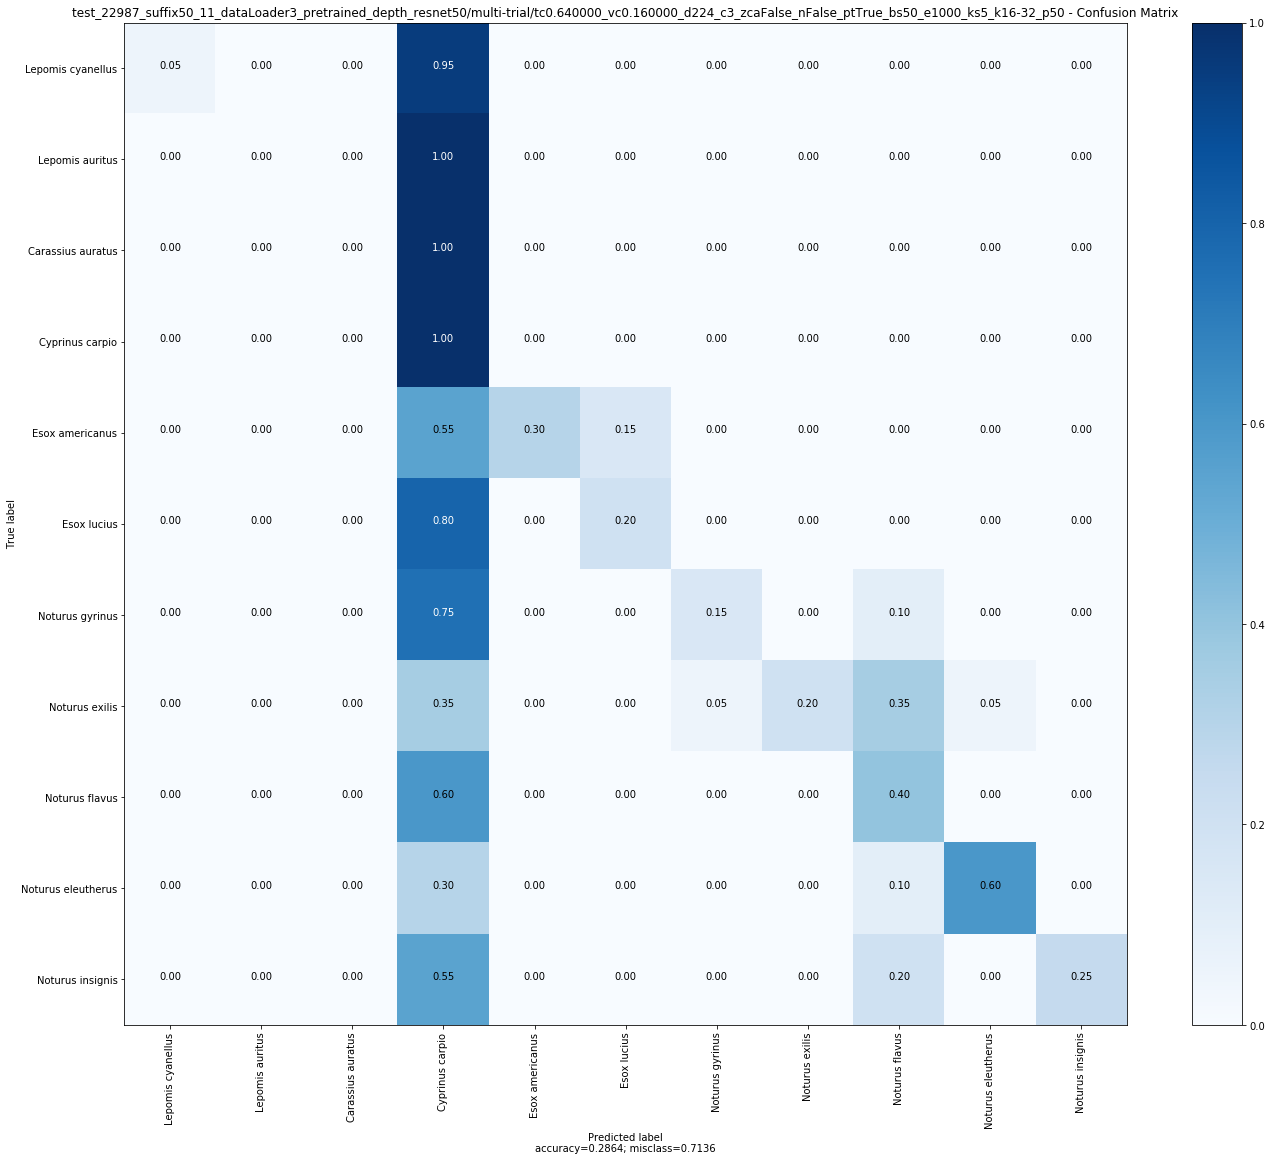

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}


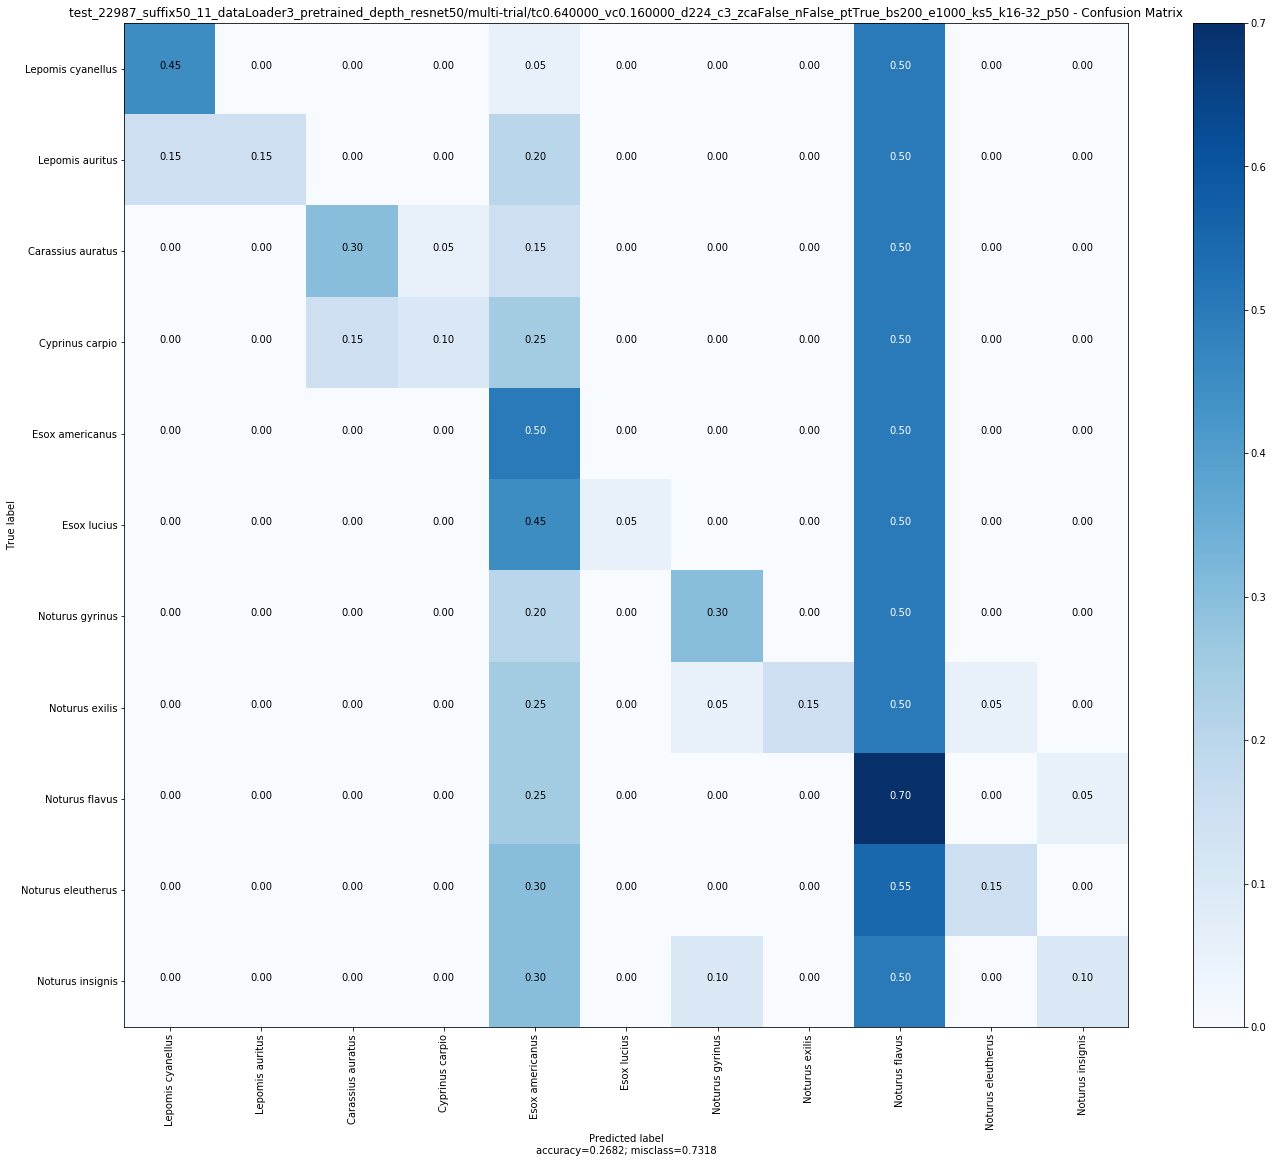

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 550, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}


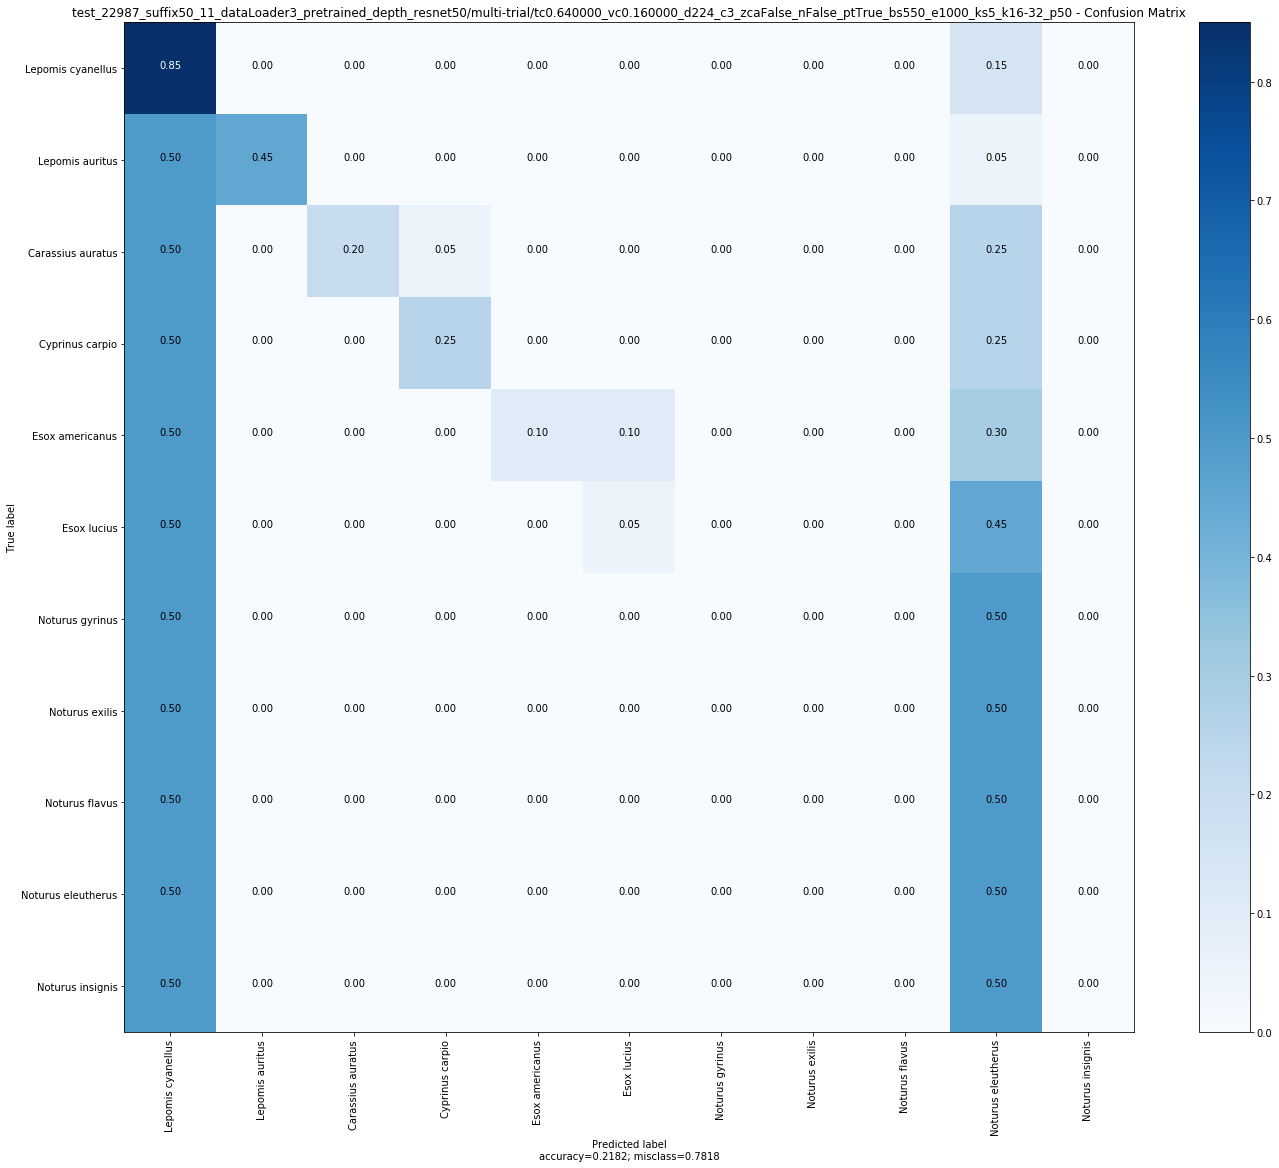

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 50, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}


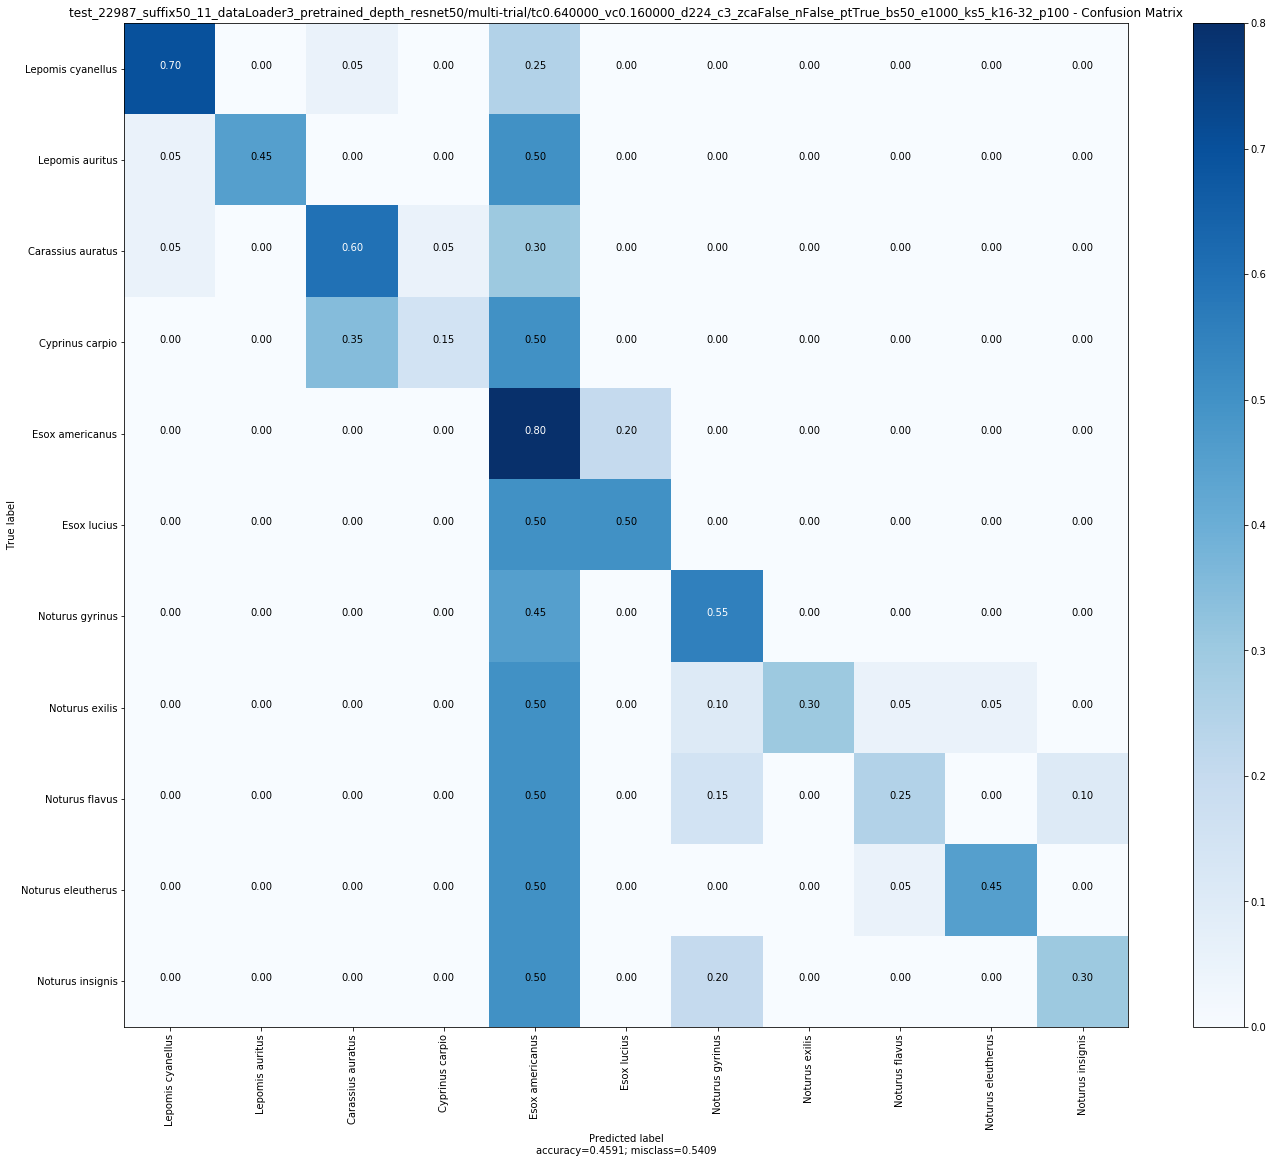

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}


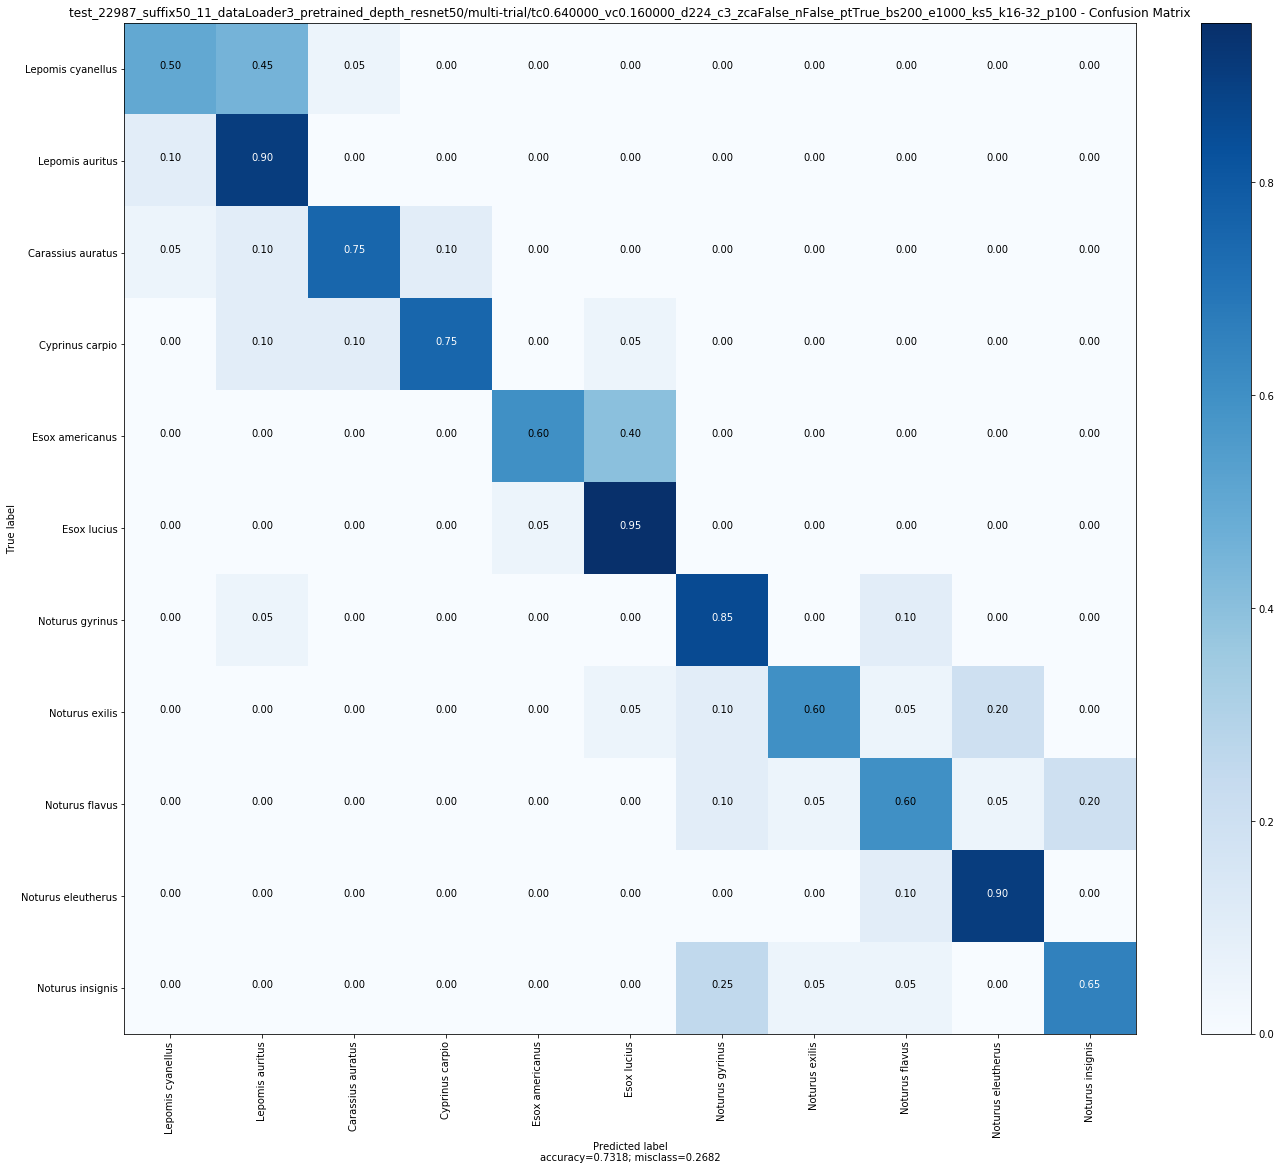

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 550, 'n_epochs': 1000, 'numOfTrials': 2, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 100}


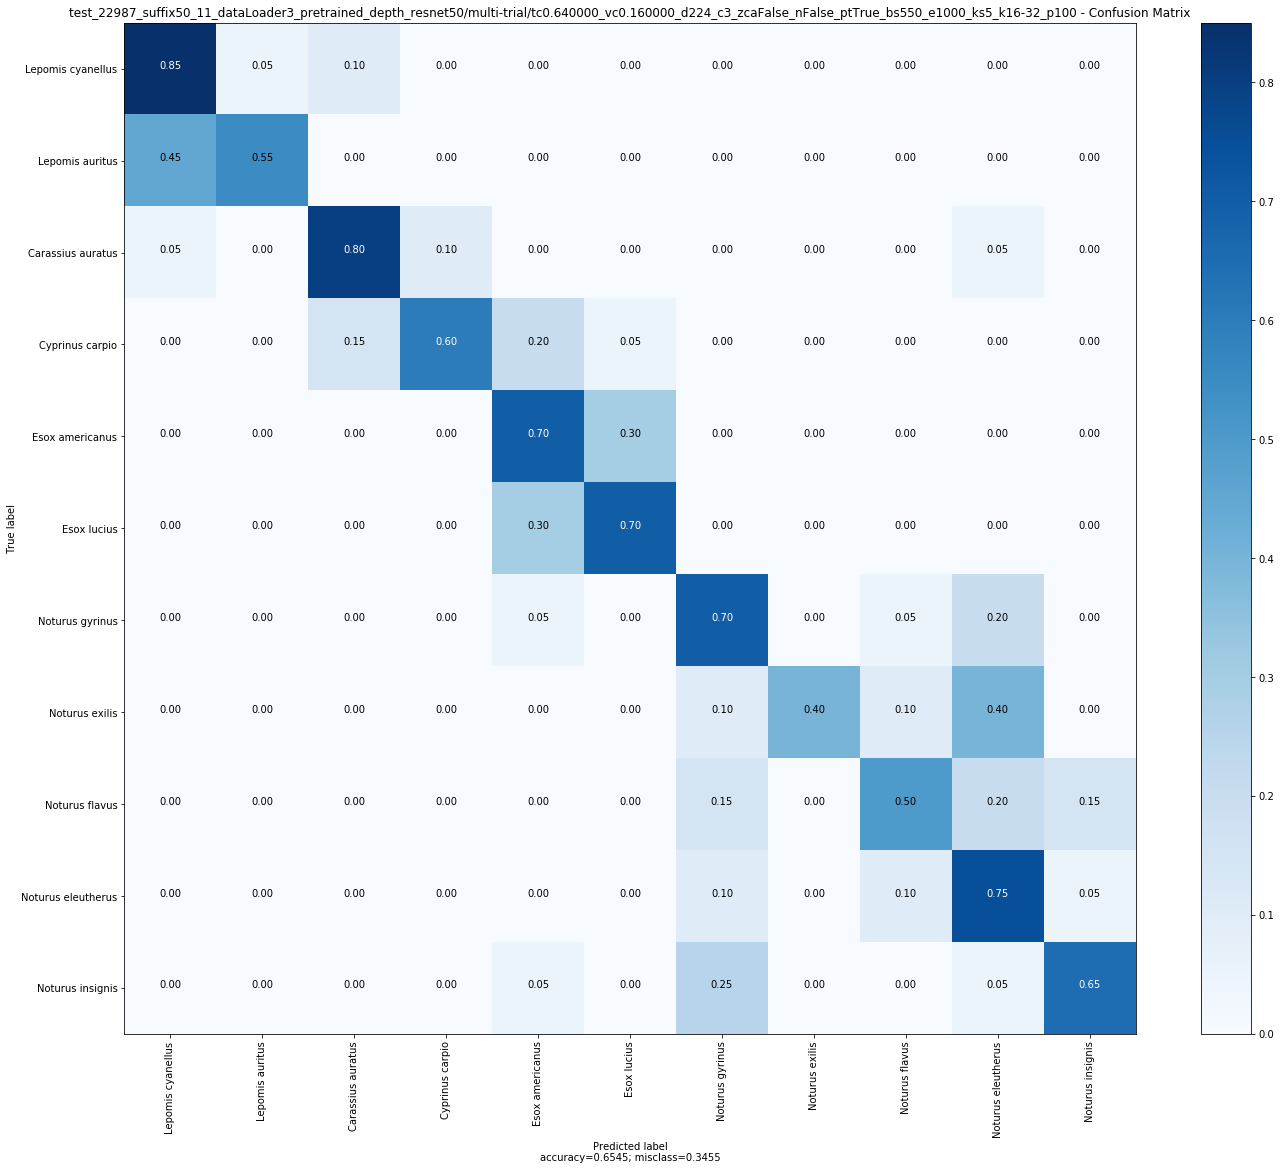

In [7]:
paramsIterator = config_parser.getHyperpIter() 
for experiment_params in paramsIterator:
    experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1
    
    print("experiment: ", experiment_params)
    
    datasetManager.updateParams(experiment_params)
    dataset = datasetManager.getDataset()
    speciesList = dataset.getSpeciesList()
    ts.printTrialConfusionMatrix(experiment_params, speciesList, True)

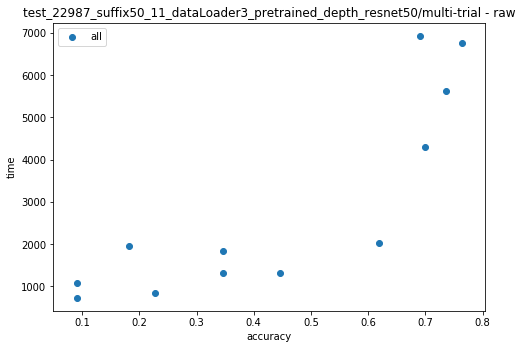

In [8]:
ts.trialScatter('accuracy', 'time', False)